<a href="https://colab.research.google.com/github/Chins-10/Data-Analyst-Portfolio/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("/content/data1.csv")

In [ ]:
data.dtypes

Date           object
Close/Last    float64
Volume         object
Open          float64
High          float64
Low           float64
dtype: object

In [ ]:
#Process the data
data['result'] = data['Open']-data['Close/Last']

In [ ]:
data['final']=data['result']<200

In [ ]:
features=['Close/Last','Open']
X=data[features]
Y=data['final']

[Text(0.3728813559322034, 0.9545454545454546, 'Open <= 11533.445\ngini = 0.229\nsamples = 250\nvalue = [33, 217]'),
 Text(0.2033898305084746, 0.8636363636363636, 'Close/Last <= 11019.7\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(0.13559322033898305, 0.7727272727272727, 'Open <= 11107.38\ngini = 0.215\nsamples = 57\nvalue = [7, 50]'),
 Text(0.1016949152542373, 0.6818181818181818, 'Open <= 10725.125\ngini = 0.137\nsamples = 54\nvalue = [4, 50]'),
 Text(0.06779661016949153, 0.5909090909090909, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.13559322033898305, 0.5909090909090909, 'Close/Last <= 10678.905\ngini = 0.287\nsamples = 23\nvalue = [4, 19]'),
 Text(0.06779661016949153, 0.5, 'Close/Last <= 10585.45\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.03389830508474576, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1016949152542373, 0.4090909090909091, 'Open <= 10841.65\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06779661016949153

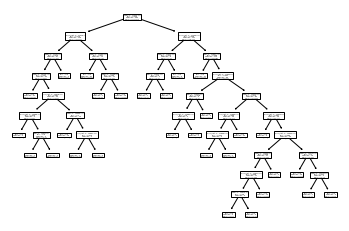

In [ ]:
#DECISION TREE display
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
tree.plot_tree(dtree, feature_names=features)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Precision: 0.9767441860465116
Accuracy: 0.92
AUC-ROC score: 0.8666666666666668


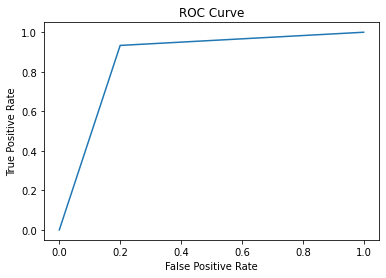

In [ ]:
#Accuracy,Precision and AUC-ROC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# Initialize a decision tree classifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Calculate the precision and accuracy of the model on the test data
precision = precision_score(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

# Calculate the predicted probabilities for the test data
proba = clf.predict_proba(X_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(Y_test, proba[:, 1])
print("Precision:", precision)
print("Accuracy:", accuracy)
print("AUC-ROC score:", auc_roc)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
#if-else rules
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import graphviz

# Load the iris dataset
iris = load_iris()

# Initialize a decision tree classifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the iris dataset
clf.fit(iris.data, iris.target)

# Display the decision tree
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")

# Export IF-THEN rules
rules = export_text(clf, feature_names=list(iris.feature_names))
print(rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [ ]:
#Optimize Decision Tree
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Load the iris dataset
iris = load_iris()

# Initialize a decision tree classifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Define a dictionary of hyperparameters to tune
params = {'max_depth': [1, 2, 3, 4, 5],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4, 5]}

# Perform a grid search over the hyperparameters using cross-validation
grid_search = GridSearchCV(clf, param_grid=params, cv=5)
grid_search.fit(iris.data, iris.target)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.96


Precision: 0.9772727272727273
Accuracy: 0.94
AUC-ROC score: 0.877777777777778


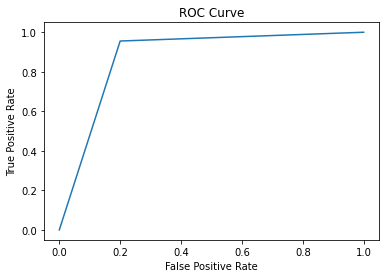

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# Initialize a decision tree classifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Calculate the precision and accuracy of the model on the test data
precision = precision_score(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

# Calculate the predicted probabilities for the test data
proba = clf.predict_proba(X_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(Y_test, proba[:, 1])
print("Precision:", precision)
print("Accuracy:", accuracy)
print("AUC-ROC score:", auc_roc)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()